### Project Objective 
To automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

**The aim of this project is to predict whether a loan will be approved or not.**

### Background Information
Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).

### Hypthosis generation
Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

>**Salary**: Applicants with high income should have more chances of loan approval.

>**Previous history**: Applicants who have repayed their previous debts should have higher chances of loan approval.

>**Loan amount**: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

>**Loan term**: Loan for less time period and less amount should have higher chances of approval.

>**Equated Monthly Installment (EMI)**: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

### The sample Dataset
* __Train file__ will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.

* __Test file__ contains all the independent variables, but not the target variable. I will apply the model to predict the target variable for the test data.

### Data Dictionary
![data dictionary](image/data_dictionay.PNG)

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read Train as a dataframe
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [4]:
print(f'The train dataset has {train.shape[0]} observations and {train.shape[1]} features')

The train dataset has 614 observations and 13 features


In [5]:
# Read Test
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [6]:
print(f'The test dataset has {test.shape[0]} observations and {test.shape[1]} features')
f'The target feature is excluded'

The test dataset has 367 observations and 12 features


'The target feature is excluded'

In [7]:
# first five observation for train
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# first five observation for train
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


`Fractional sample of the dataset at the different point. This select a random sample every time the code is run. Its essence is to obtain a more specific overview of each features.`

In [9]:
# obtain fractional sample of the dataset at the diff. point
train.sample(frac=0.1,axis=0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
254,LP001844,Male,No,0,Graduate,Yes,16250,0.000000,192.0,360.0,0.0,Urban,N
118,LP001421,Male,Yes,0,Graduate,No,5568,2142.000000,175.0,360.0,1.0,Rural,N
69,LP001241,Female,No,0,Graduate,No,4300,0.000000,136.0,360.0,0.0,Semiurban,N
282,LP001915,Male,Yes,2,Graduate,No,2301,985.799988,78.0,180.0,1.0,Urban,Y
342,LP002119,Male,Yes,1,Not Graduate,No,4554,1229.000000,158.0,360.0,1.0,Urban,Y
87,LP001282,Male,Yes,0,Graduate,No,2500,2118.000000,104.0,360.0,1.0,Semiurban,Y
297,LP001954,Female,Yes,1,Graduate,No,4666,0.000000,135.0,360.0,1.0,Urban,Y
307,LP001994,Female,No,0,Graduate,No,2400,1863.000000,104.0,360.0,0.0,Urban,N
325,LP002067,Male,Yes,1,Graduate,Yes,8666,4983.000000,376.0,360.0,0.0,Rural,N
364,LP002180,Male,No,0,Graduate,Yes,6822,0.000000,141.0,360.0,1.0,Rural,Y


*A series of data showing the value counts of `Coapplicant Income`*

In [10]:
# obtain the value of the categorical type that has the highest frequency
print(train['CoapplicantIncome'].value_counts())

0.0        273
1666.0       5
2083.0       5
2500.0       5
1750.0       3
1459.0       3
2333.0       3
1800.0       3
1625.0       3
2250.0       3
5625.0       3
2451.0       2
1640.0       2
2917.0       2
1560.0       2
20000.0      2
1717.0       2
1950.0       2
1843.0       2
2569.0       2
3750.0       2
4167.0       2
3500.0       2
2925.0       2
1300.0       2
1430.0       2
754.0        2
3167.0       2
1667.0       2
4416.0       2
          ... 
1881.0       1
1041.0       1
3583.0       1
3013.0       1
7250.0       1
3300.0       1
1302.0       1
1287.0       1
2340.0       1
1710.0       1
2330.0       1
4648.0       1
3447.0       1
1774.0       1
3796.0       1
1425.0       1
5701.0       1
2079.0       1
3033.0       1
5302.0       1
1131.0       1
7101.0       1
5500.0       1
1779.0       1
1863.0       1
7166.0       1
2138.0       1
2166.0       1
3541.0       1
3021.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


In [11]:
print(f'''It was observed that {train['CoapplicantIncome'].value_counts().max()} loan obervations have 
      {train['CoapplicantIncome'].value_counts().idxmax()} coapplicantIncome''')


print('''\nThis can implies that those loan requests with 0.0 coapplicant income involved only one person
OR the coapplicant has no income value OR he/she is unemployed''')

It was observed that 273 loan obervations have 
      0.0 coapplicantIncome

This can implies that those loan requests with 0.0 coapplicant income involved only one person
OR the coapplicant has no income value OR he/she is unemployed


In [12]:
# Copy of original data so that the original is retained even after making changes
train_original=train.copy()
test_original=test.copy()

 ***Features in the train dataset***

In [13]:
# Features in the dataset
print(train.columns.to_frame(index=False))

                    0
0             Loan_ID
1              Gender
2             Married
3          Dependents
4           Education
5       Self_Employed
6     ApplicantIncome
7   CoapplicantIncome
8          LoanAmount
9    Loan_Amount_Term
10     Credit_History
11      Property_Area
12        Loan_Status


*A proof that loan status is missing in the test dataset*

In [14]:
# loan status missing in the test dataset
print(test.columns.to_frame(index=False))

                    0
0             Loan_ID
1              Gender
2             Married
3          Dependents
4           Education
5       Self_Employed
6     ApplicantIncome
7   CoapplicantIncome
8          LoanAmount
9    Loan_Amount_Term
10     Credit_History
11      Property_Area


**Print data types for each variable**

In [15]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Data types for each features is okay by me and they can be use for further action

The types of variables in the dataset are Categorical, ordinal and numerical.

>__Categorical features__: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

>__Ordinal features__: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

>__Numerical features__: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

`The number of unique observation we have in each feature`

In [16]:
# get the number of unique observation
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

`Table showing the different unique observations for Loan_Amount_Term`

In [17]:
# check the different unique observation for Loan_Amount_Term
print('Loan_Amount_Term')
(train.Loan_Amount_Term
                  .value_counts().to_frame(name='count'))



Loan_Amount_Term


,count
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
36.0,2
60.0,2
12.0,1


In [18]:
# get a dictionary of value counts to make a quick check for outlier, mistyped parameter, recurring values
dict_of_value_counts = {a:b.value_counts() for a,b in train.items()}

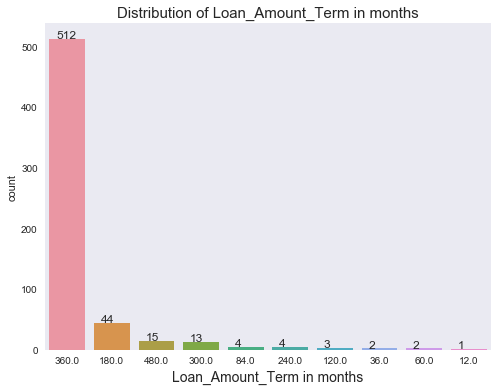

In [19]:
# visualize the Loan_Amount_Term to get glimpse of the picture
fig=plt.figure(figsize=(8,6))
sns.set(style="dark")
ax=sns.countplot(x='Loan_Amount_Term',data=train,
             order=list(dict_of_value_counts['Loan_Amount_Term'].index))
ax.set_title('Distribution of Loan_Amount_Term in months', fontsize=15)
ax.set_xlabel('Loan_Amount_Term in months', fontsize=14)
sns.despine(left=True,bottom=True)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

***It was observed that majority of the loan request indicate 360 months (30 years) paying back term implying that most of the loan request are long term loan.***


`Table showing the different unique observations for Dependents`

In [20]:
# check the different unique observation for Dependent
train.Dependents.value_counts().to_frame()

,Dependents
0,345
1,102
2,101
3+,51


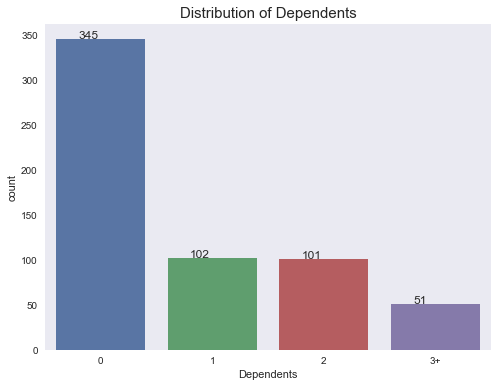

In [21]:
# visualize the Dependents to get glimpse of the picture
fig=plt.figure(figsize=(8,6))
sns.set(style="dark")
ax=sns.countplot(x='Dependents',data=train,
             order=list(dict_of_value_counts['Dependents'].index))
ax.set_title('Distribution of Dependents', fontsize=15)
sns.despine(left=True,bottom=True)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+1))

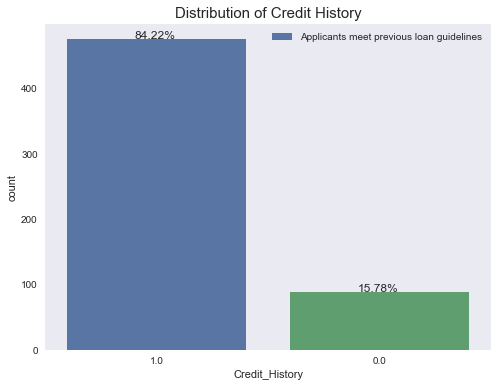

In [22]:
# visualize the Credit_History to get glimpse of the picture
fig=plt.figure(figsize=(8,6))
sns.set(style="dark")
ax=sns.countplot(x='Credit_History',data=train,
             order=list(dict_of_value_counts['Credit_History'].index))
ax.set_title('Distribution of Credit History', fontsize=15)
ax.legend(['Applicants meet previous loan guidelines'])
sns.despine(left=True,bottom=True)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()/dict_of_value_counts['Credit_History'].sum())*100),
                (p.get_x()+0.30, p.get_height()+1))

`It was observed that 84% of those requesting for loan have once met a previous loan guidelines i.e. have repaid their debts.`

### Other Categorical Variable 

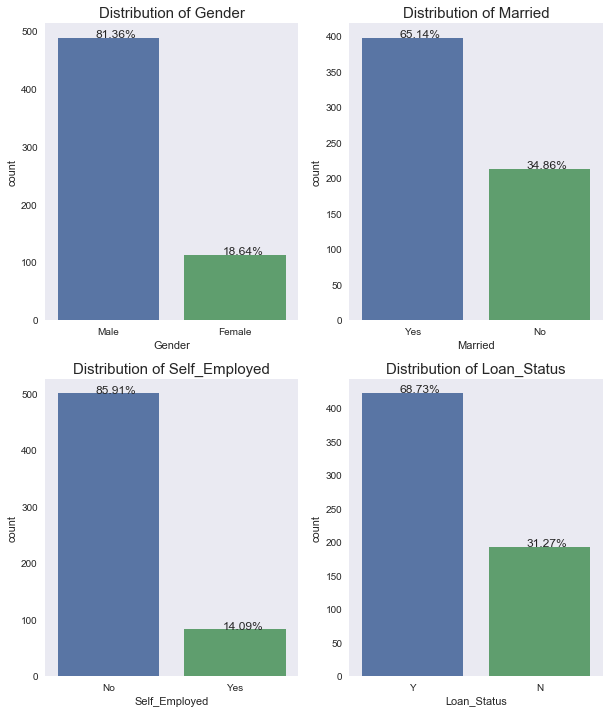

In [23]:
plt.figure(figsize=(10,12))
a = ['Gender','Married','Self_Employed','Loan_Status']
for x,y in enumerate(range(221,225)):
    plt.subplot(y)
    ax=sns.countplot(x=a[x],data=train,
                 order=list(dict_of_value_counts[a[x]].index))
    ax.set_title('Distribution of {}'.format(a[x]), fontsize=15)
    sns.despine(left=True,bottom=True)
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/dict_of_value_counts[a[x]].sum())*100),
                    (p.get_x()+0.30, p.get_height()+1))
    


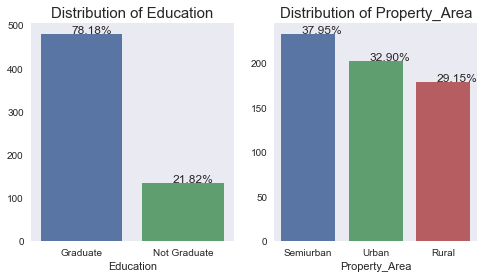

In [24]:
plt.figure(figsize=(8,4))
a = ['Education','Property_Area']
for x,y in enumerate(range(121,123)):
    plt.subplot(y)
    ax=sns.countplot(x=a[x],data=train,
                 order=list(dict_of_value_counts[a[x]].index))
    ax.set_ylabel('')
    ax.set_title('Distribution of {}'.format(a[x]), fontsize=15)
    sns.despine(left=True,bottom=True)
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/dict_of_value_counts[a[x]].sum())*100),
                    (p.get_x()+0.30, p.get_height()+1))
    


**The following inferences can be made from the above plots:**

* `Most of the applicants don’t have any dependents.`

* `Around 80% of the applicants are Graduate.`

* `Most of the applicants are from Semiurban area.`

**Descriptive statistic of categorical features shown below**

In [25]:
train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001931,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


`From the above table, it was revealed that Gender, Married, Dependants, Self_Employed have missing values.`

***Checking for missing values in categorical variables.***

In [26]:
# check for missing values in categorical variables
train.select_dtypes(exclude=np.number).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
Loan_ID          614 non-null object
Gender           601 non-null object
Married          611 non-null object
Dependents       599 non-null object
Education        614 non-null object
Self_Employed    582 non-null object
Property_Area    614 non-null object
Loan_Status      614 non-null object
dtypes: object(8)
memory usage: 332.5 KB


In [27]:
# obtain column with missing values,their dtypes and frequency
num_of_missing_values=train.isnull().apply(lambda x:sum(x))

col_with_missing_values=num_of_missing_values.loc[num_of_missing_values>0]
print('column with missing values,their dtypes and frequency')

[f'{a} : {train[a].dtypes}: {num_of_missing_values[a]}' 
 for a in col_with_missing_values.index] 

column with missing values,their dtypes and frequency


['Gender : object: 13',
 'Married : object: 3',
 'Dependents : object: 15',
 'Self_Employed : object: 32',
 'LoanAmount : float64: 22',
 'Loan_Amount_Term : float64: 14',
 'Credit_History : float64: 50']

In [28]:
# display it as a dataframe
col_with_missing_values=col_with_missing_values.to_frame(name='num_missing_val')
col_with_missing_values

,num_missing_val
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


### Bivariate Analysis of Categorical Independent variables and the target variable
**Since the target variable is a categorical variable, and we interested to find the relationship between this response and other categorical varaiable (Categorical vs Catgorical)**

**_The question of interest will be how associated the two features are?_**

 **This finding can easily be obtained with a chart (mosaic chart)**

### Background Knowledge on finding the association between two categorical variables

**Stacked Column chart** is a useful graph to visualize the relationship between two categorical variables. It compares the percentage that each category from one variable contributes to a total across categories of the second variable. 

**The chi-square test** can be used to determine the association between categorical variables. It is based on the difference between the expected frequencies (e) and the observed frequencies (n) in one or more categories in the frequency table. The chi-square distribution returns a probability for the computed chi-square and the degree of freedom. A probability of zero shows a complete dependency between two categorical variables and a probability of one means that two categorical variables are completely independent. Tchouproff Contingency Coefficient measures the amount of dependency between two categorical variables.		
 





![chi square formula](image/chi_square_formula.PNG)

![chi square computation](image/chi_square_computation.PNG)

### Interpreting Chi square and more fact to know about it

A large value of the __Chi Square statistic__ indicates a large deviation from what we would expect with no association. 

This test is invalid when the observed or expected frequencies in each category are too small. A __typical rule is that all of the observed and expected frequencies should be at least 5__.

The default degrees of freedom, k-1, are for the case when no parameters of the distribution are estimated. If p parameters are estimated by efficient maximum likelihood then the correct degrees of freedom are k-1-p. If the parameters are estimated in a different way, then the dof can be between k-1-p and k-1. However, it is also possible that the asymptotic distribution is not a chisquare, in which case this test is not appropriate.

__Chi square goodness of fit__ tests whether the distribution of sample categorical data matches an expected distribution. For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire U.S. population or whether the computer browser preferences of your friends match those of Internet uses as a whole.

When working with categorical data, the values themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning. Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.

__Chi-Squared Test of Independence__

*Independence* is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another. For instance, the month you were born probably doesn't tell you anything about which web browser you use, so we'd expect birth month and browser preference to be independent. On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

The __chi-squared test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion__.

[Read more here](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html)

>**Relationship of Gender vs Loan_Status (how associated gender is to Loan_Status)?**

`Table showing the proportion of Gender to Loan_Status in %`

In [29]:
# Table showing the proportion of Gender to Loan_Status in % 
pd.crosstab(train.Gender,train.Loan_Status,normalize=True)

Loan_Status,N,Y
Gender,,
Female,0.061564,0.124792
Male,0.249584,0.564060


`Table showing the actual proportion of Gender to Loan_Status `

In [30]:
# print the cross tabulation of Loan_Status vs Gender
gender = pd.crosstab(train.Gender,train.Loan_Status)
print(gender)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


`Table showing the percentage proportion of each Loan Status per Gender`

In [31]:
# obtain the percentage of each Loan_Status per Gender
gender.divide(gender.sum(axis=1)
     .astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<function matplotlib.pyplot.text>

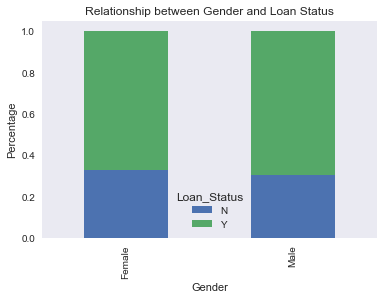

In [32]:
sns.set_style('dark')
(gender.divide(gender.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(6,4)))
plt.title('Relationship between Gender and Loan Status')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.text

`It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.`

**Test of Independence with chi square test of Independence**

`Expected Count table for  gender in respect to Loan Status`

In [33]:
# We can quickly get the expected counts for all cells in the table 
# by taking the row totals and column totals of the table, 
# performing an outer product on them with the np.outer() function and dividing by the number of observations:

col_sum_gender=gender.sum(axis=1)
row_sum_gender=gender.sum(axis=0)
expected = np.outer(col_sum_gender,row_sum_gender)/col_sum_gender.sum()
expected = pd.DataFrame(expected)
expected.columns = ['N','Y']
expected.index = ['Female','Male']
expected

,N,Y
Female,34.848586,77.151414
Male,152.151414,336.848586


*Expected counts table is designed to reflect what the sample data counts would be if the two variables were independent.* 

The statistical question becomes, **"Are the observed counts so different from the expected counts that we can conclude a relationship between the two variables?"**

*In this particular case they are no huge difference*  **so we can initially/partially conclude the variable are independents (no association between them)**

In [34]:
# calculate the chi-square-statistic
chi_squared_stat = ((((gender-expected)**2)/expected).sum().sum())
print('chi_squared_stat')
print(chi_squared_stat)

chi_squared_stat
0.23697508750826923


In [35]:
import scipy.stats as stats
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *
stats.chi2
print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.8414588206941236
P value
0.6263994534115932


### The decision making approach
We make our decision by either comparing the value of the test statistic to a critical value (rejection region approach), or by finding the probability of getting this test statistic value or one more extreme (p-value approach). 

**We accept the null hypotheses because critical value of 3.84 > 0.236 of chi squared statistic.**

*We have statistically significant evidence at a =0.05 to show that null hypotheses is true or that gender and Loan status are independent (i.e., they are not dependent or related), p < 0.005.*

In [36]:
g, p, dof, expctd = stats.chi2_contingency(observed= gender)

In [37]:
print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

The chi square statistic is 0.13962612116543877
The P-value is 0.7086529816451106
The degree of freedom is 1
The expected count table 


array([[ 34.84858569,  77.15141431],
       [152.15141431, 336.84858569]])

*We don't have a significant result at 5% significance level since the p-value (0.71) is greater than 0.05.*

**We accept the null hypothesis that Loan_Status of applicant and their gender on a loan eligibility process are independent. We conclude that they are independent, that there is no association between the two variables.**

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


<function matplotlib.pyplot.text>

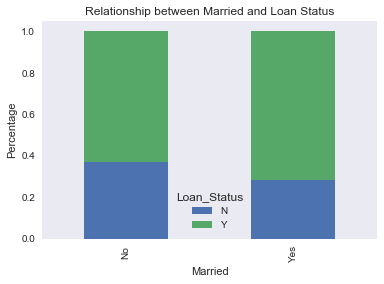

In [38]:
# Married vs Loan_Status
married = pd.crosstab(train.Married,train.Loan_Status)
print(married)

(married.divide(married.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(6,4)))
plt.title('Relationship between Married and Loan Status')
plt.xlabel('Married')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)
plt.text

In [39]:
g, p, dof, expctd = stats.chi2_contingency(observed= married)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

The chi square statistic is 4.475019348315097
The P-value is 0.03439381301579988
The degree of freedom is 1
The expected count table 


array([[ 66.93289689, 146.06710311],
       [125.06710311, 272.93289689]])

In [40]:
expctd = pd.DataFrame(expctd)
expctd

,0,1
0,66.932897,146.067103
1,125.067103,272.932897


In [41]:
# calculate the chi-square-statistic
chi_squared_stat = ((((married-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *
print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
# print("P value")
# print(p_value)

Critical value
3.8414588206941236


It can be inferred that the Proportion of married applicants is higher for the approved loans.

**Critical value of 3.84 < 4.41 of  chi square statistic, We  have a significant result at 5% significance level since the p-value (0.03) is less than 0.05.**

`We can conclude that Loan Status of an applicant is associated with their married status.`

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


<function matplotlib.pyplot.text>

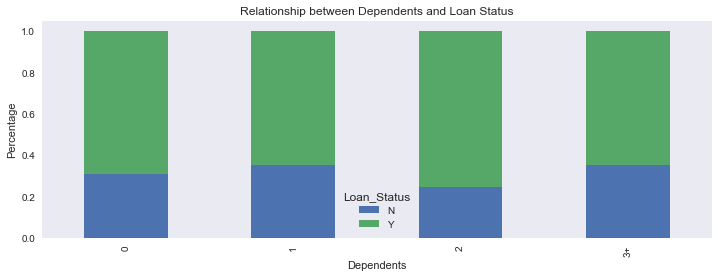

In [42]:
# Dependents vs Loan_Status
dependents = pd.crosstab(train.Dependents,train.Loan_Status)
print(dependents)

(dependents.divide(dependents.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(12,4)))
plt.title('Relationship between Dependents and Loan Status')
plt.xlabel('Dependents')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)
plt.text

In [43]:
g, p, dof, expctd = stats.chi2_contingency(observed= dependents)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

The chi square statistic is 3.158339770698263
The P-value is 0.3678506740863211
The degree of freedom is 3
The expected count table 


array([[107.12854758, 237.87145242],
       [ 31.67278798,  70.32721202],
       [ 31.36227045,  69.63772955],
       [ 15.83639399,  35.16360601]])

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.


In [44]:
# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
expctd
chi_squared_stat = ((((dependents-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # *
print("Critical value")
print(crit)

# p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
#                              df=3)
# print("P value")
# print(p_value)

Critical value
7.8147279032511765


Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


<function matplotlib.pyplot.text>

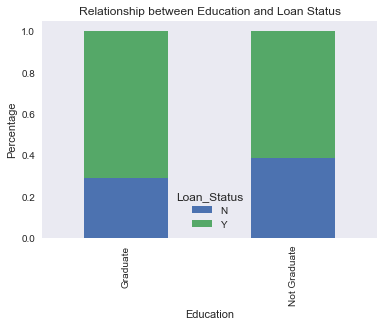

In [45]:
# Education vs Loan_Status
education = pd.crosstab(train.Education,train.Loan_Status)
print(education)

(education.divide(education.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(6,4)))
plt.title('Relationship between Education and Loan Status')
plt.xlabel('Education')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)
plt.text

In [46]:
g, p, dof, expctd = stats.chi2_contingency(observed= education)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
print(expctd)
chi_squared_stat = ((((education-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *
print("Critical value")
print(crit)

The chi square statistic is 4.091490413303621
The P-value is 0.04309962129357355
The degree of freedom is 1
The expected count table 
           0          1
0  150.09772  329.90228
1   41.90228   92.09772
Critical value
3.8414588206941236


**Critical value of 3.84 < 4.09 of chi square statistic, We have a significant result at 5% significance level since the p-value (0.04) is less than 0.05.**

`We can conclude that Loan Status of an applicant is associated to their education level.`

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


<function matplotlib.pyplot.text>

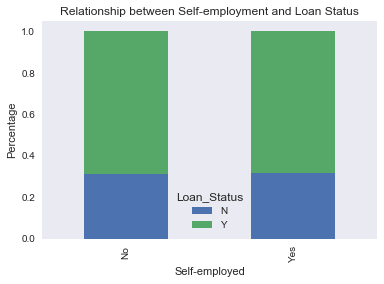

In [47]:
# Self-employment vs Loan_Status
self_employed = pd.crosstab(train.Self_Employed,train.Loan_Status)
print(self_employed)

(self_employed.divide(self_employed.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(6,4)))
plt.title('Relationship between Self-employment and Loan Status')
plt.xlabel('Self-employed')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)
plt.text

In [48]:
g, p, dof, expctd = stats.chi2_contingency(observed= self_employed)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
print(expctd)
chi_squared_stat = ((((self_employed-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *
print("Critical value")
print(crit)

The chi square statistic is 0.005292770110001114
The P-value is 0.9420039242223718
The degree of freedom is 1
The expected count table 
            0           1
0  157.216495  342.783505
1   25.783505   56.216495
Critical value
3.8414588206941236


`There is nothing significant we can infer from Self_Employed vs Loan_Status plot`

*Critical value > chi square statistic, p-value > 0.05 and nearly 1*

*Also No significance difference in the expected count table.*

>**Though Credit_History dtypes is float64, it is more of a categorical variable because it has a unique value of 0 (credit history does not meets guidelines) and 1 (credit history does meets guideline)**

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


<function matplotlib.pyplot.text>

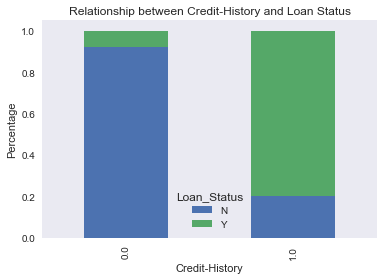

In [49]:
# credit_history vs Loan_Status
credit_history = pd.crosstab(train.Credit_History,train.Loan_Status)
print(credit_history)

(credit_history.divide(credit_history.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(6,4)))
plt.title('Relationship between Credit-History and Loan Status')
plt.xlabel('Credit-History')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)
plt.text

In [50]:
g, p, dof, expctd = stats.chi2_contingency(observed= credit_history)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
print(expctd)
chi_squared_stat = ((((credit_history-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *
print("Critical value")
print(crit)

The chi square statistic is 174.63729658142535
The P-value is 7.184759548750746e-40
The degree of freedom is 1
The expected count table 
            0           1
0   28.246454   60.753546
1  150.753546  324.246454
Critical value
3.8414588206941236


It seems people with credit history as 1 are more likely to get their loans approved.


**Critical value of 3.84 is far less than 174.64 of chi square statistic, We have a significant result at 5% significance level since the p-value is nearly 0.00 which shows a complete dependency between the two variables.**

*`We can conclude that Loan Status of an applicant is strongly associated to their credit history.`*

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


<function matplotlib.pyplot.text>

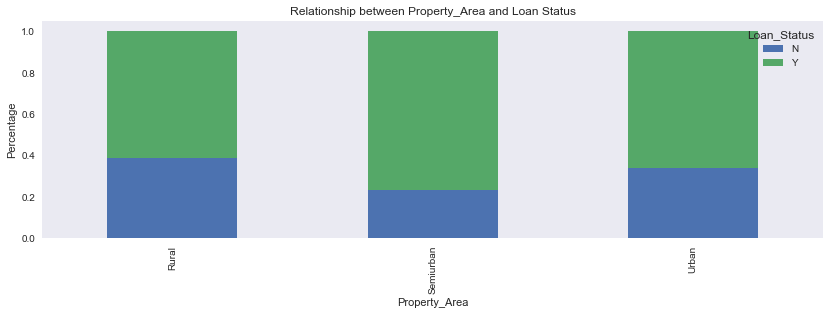

In [51]:
# credit_history vs Loan_Status
property_area = pd.crosstab(train.Property_Area,train.Loan_Status)
print(property_area)

(property_area.divide(property_area.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(14,4)))
plt.title('Relationship between Property_Area and Loan Status')
plt.xlabel('Property_Area')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)
plt.text

In [52]:
g, p, dof, expctd = stats.chi2_contingency(observed= property_area)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
print(expctd)
chi_squared_stat = ((((property_area-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # *
print("Critical value")
print(crit)

The chi square statistic is 12.297623130485675
The P-value is 0.0021360187811644937
The degree of freedom is 2
The expected count table 
           0           1
0  55.973941  123.026059
1  72.859935  160.140065
2  63.166124  138.833876
Critical value
5.99146454710798


*It seems people living in semi urban area  are more likely to get their loans approved.*


**Critical value of 5.99 is  less than 12.29 of chi square statistic, We have a significant result at 5% significance level since the p-value is nearly 0.00 which shows a complete dependency between the two variables.**

*`We can conclude that Loan Status of an applicant is strongly associated to their property area and Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.`*

### Bivariate analysis of Numerical Independent variable and the target variable

`Descriptive statistic of numerical variables`

In [53]:
# obtain descriptive statistic of numerical variables
train.describe(percentiles=[.01,.05,.1,.2,.4,.5,.7,.85,.95,.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
1%,1025.000000,0.000000,30.000000,84.00000,0.000000
5%,1897.550000,0.000000,56.000000,180.00000,0.000000
10%,2216.100000,0.000000,71.000000,294.00000,0.000000
20%,2605.400000,0.000000,95.000000,360.00000,1.000000
40%,3406.800000,0.000000,116.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000


### Analyzing the Applicant income
*We will try to find the mean income of people for which the loan has been approved* **VS** *the mean income of people for which the loan has not been approved.*

In [54]:
ax=train.groupby('Loan_Status')['ApplicantIncome'].mean()
print(ax)

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


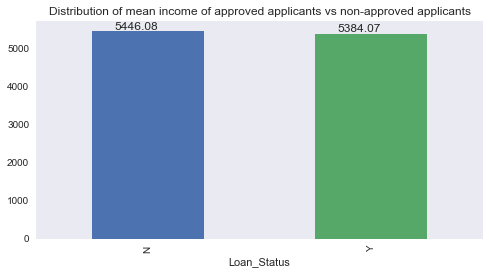

In [55]:
fig=plt.figure(figsize=(8,4))
ax=train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')
ax.set_title('Distribution of mean income of approved applicants vs non-approved applicants')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()),
                (p.get_x()+0.10, p.get_height()+50))

**We don’t see any significant difference in the mean income of these two categories.**

These can make us reject our null hypotheses which is  `Applicants with high income should have more chances of loan approval.`

This implies that `Applicant income has no association with his/her loan eligibilty`

**However let dive more into it.** 

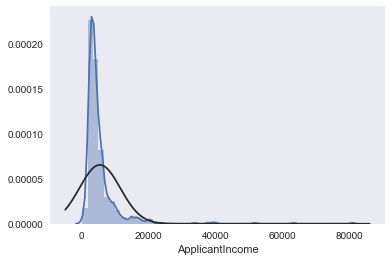

In [56]:
from scipy.stats import norm
sns.set(style="dark")
ax = sns.distplot(train.ApplicantIncome, fit=norm, kde=True)
sns.despine(left=True,bottom=True)

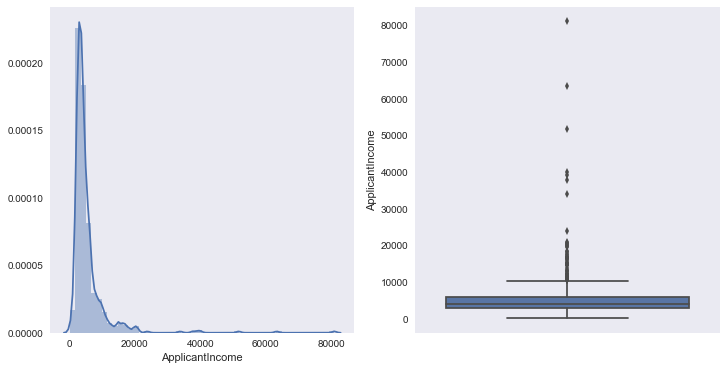

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
# train['ApplicantIncome'].plot.box(figsize=(16,5))
a=sns.boxplot(y='ApplicantIncome',data=train,notch=False)
# a = sns.swarmplot( y='ApplicantIncome', data=train, color=".2")


**The above charts shows that the ApplicantIncome is not normally distributed.**

`It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.`

`The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.`



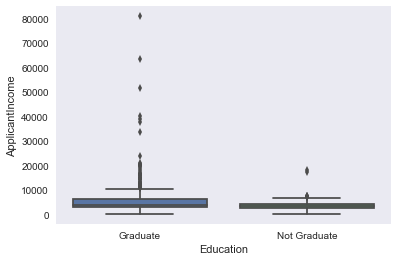

In [58]:
# segregate Applicant Income by Education
a=sns.boxplot(x='Education',y='ApplicantIncome',data=train,notch=False)

`We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers`.

*So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.*

`We can decide the bins by looking into its descriptive statistic` 

In [59]:
# the describe statistic of ApplicantIncome to decide for the binning range
train.ApplicantIncome.describe(percentiles=[.01,.05,.1,.25,.4,.5,.75,.85,.95,.99])

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
1%        1025.000000
5%        1897.550000
10%       2216.100000
25%       2877.500000
40%       3406.800000
50%       3812.500000
75%       5795.000000
85%       7578.250000
95%      14583.000000
99%      32540.410000
max      81000.000000
Name: ApplicantIncome, dtype: float64

`I conclude choosing the following bins:`

Category | Income range
-------- | ------------
Low | 0-2500
Average | 2500-4000
High | 4000-6000
Very High | >6000 

In [60]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['ApplicantIncome_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

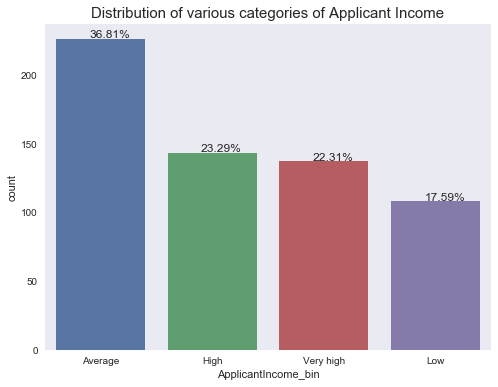

In [61]:
dict_of_value_counts = {a:b.value_counts() for a,b in train.items()}
fig=plt.figure(figsize=(8,6))
sns.set(style="dark")
ax=sns.countplot(x='ApplicantIncome_bin',data=train,
             order=list(dict_of_value_counts['ApplicantIncome_bin'].index))
ax.set_title('Distribution of various categories of Applicant Income', fontsize=15)
sns.despine(left=True,bottom=True)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()/dict_of_value_counts['ApplicantIncome_bin'].sum())*100),
                (p.get_x()+0.30, p.get_height()+1))

Loan_Status           N    Y
ApplicantIncome_bin         
Low                  34   74
Average              67  159
High                 45   98
Very high            46   91


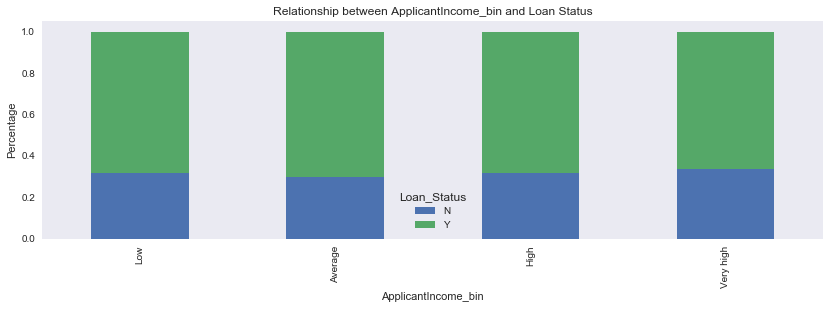

In [62]:
applicantIncome_bin = pd.crosstab(train.ApplicantIncome_bin,train.Loan_Status)
print(applicantIncome_bin)

(applicantIncome_bin.divide(applicantIncome_bin.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(14,4)))
plt.title('Relationship between ApplicantIncome_bin and Loan Status')
plt.xlabel('ApplicantIncome_bin')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)

`It can  now be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.`

In [63]:
g, p, dof, expctd = stats.chi2_contingency(observed= applicantIncome_bin)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
print(expctd)
chi_squared_stat = ((((applicantIncome_bin-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # *
print("Critical value")
print(crit)

The chi square statistic is 0.6213577939863809
The P-value is 0.8915260581064367
The degree of freedom is 3
The expected count table 
           0           1
0  33.771987   74.228013
1  70.671010  155.328990
2  44.716612   98.283388
3  42.840391   94.159609
Critical value
7.8147279032511765


`The critical value of 7.81 > 0.62 of chi square statistic and We don't have significant result at 5% significance level since the p-value(0.89) is nearly 1.00 which shows a complete independency between the two variables.` 

`Comparing the expected count table with the observed count further reveal that the Loan Status of an applicant with average and very high income are partially related or associated because there is a significant change in their values`

### Coapplicant Income analyze

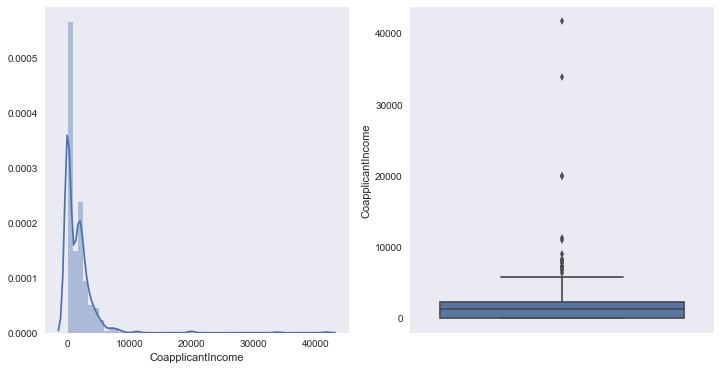

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
a=sns.boxplot(y='CoapplicantIncome',data=train,notch=False)

`We see a similar distribution as that of the applicant income. Majority (more than 90%) of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.`

Education
Graduate        480
Not Graduate    134
Name: CoapplicantIncome, dtype: int64


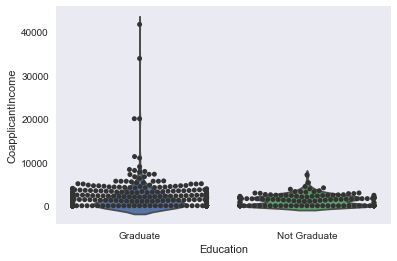

In [65]:
# segregate Applicant Income by Education
ax=train.groupby('Education')['CoapplicantIncome'].count()
print(ax)
a=sns.violinplot(x='Education',y='CoapplicantIncome',data=train,inner=None)
a = sns.swarmplot(x='Education', y="CoapplicantIncome", data=train, color=".2")

*It is shown above that majority of the Coapplicant are graduate and they have low income*

`The descriptive statistic reveal that more than 40% of Coapplicant has 0.0 income and it was earlier observed that 273 loan obervations have 0.0 coapplicantIncome`

`This can implies that those loan requests with 0.0 coapplicant income involved only one person
OR the coapplicant has no income value OR he/she is unemployed`

In [66]:
coapplicant=(train.CoapplicantIncome
             .apply(lambda x: 'No coapplicant or Coapplicant has no income' if x==0 else 'Coapplicant exist and has an income')
             .value_counts()
             .to_frame(name='count'))
coapplicant


,count
Coapplicant exist and has an income,341
No coapplicant or Coapplicant has no income,273


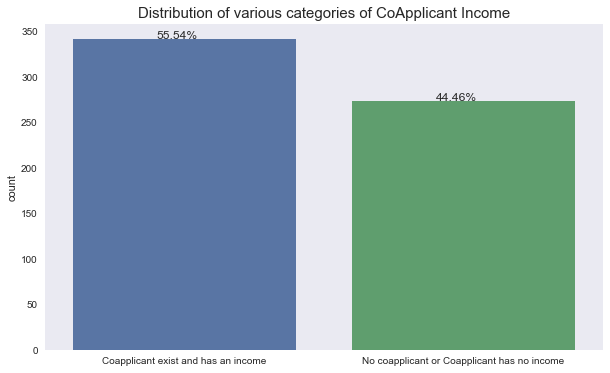

In [67]:
# sns.set(style="white")
fig=plt.figure(figsize=(10,6))
ax= sns.barplot(x=coapplicant.index,y='count',
            data=coapplicant,
             order=list(coapplicant.index))
ax.set_title('Distribution of various categories of CoApplicant Income', fontsize=15)
sns.despine(left=True,bottom=True)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()/dict_of_value_counts['CoapplicantIncome'].sum())*100),
                (p.get_x()+0.30, p.get_height()+1))

**It can be observed that 44.46% of the loan applicant has no coapplicant**

In [68]:
# The average coaplicant income excluding those of zero 
a = (train.CoapplicantIncome
 .map(lambda x:x if x>0 else np.nan)
 .mean(skipna=True))

print(('''The true mean of coapplicant income is {:.2f} aganist {:.2f} that is 
obtained if those zeros of no coapplicant or unemployed coapplicant are included in computation'''  
    
.format(a,train.CoapplicantIncome.mean() )))

The true mean of coapplicant income is 2919.19 aganist 1621.25 that is 
obtained if those zeros of no coapplicant or unemployed coapplicant are included in computation


In [69]:
employed_coapplicant=(train.CoapplicantIncome
 .map(lambda x:x if x>0 else np.nan)
 .agg([np.min,np.mean,np.max,np.std])
  .to_frame())

employed_coapplicant.index = ['min_income of the employed',
                              'mean_income of the employed','max_income of the employed','std_value of employed']
employed_coapplicant

,CoapplicantIncome
min_income of the employed,16.120001
mean_income of the employed,2919.193314
max_income of the employed,41667.000000
std_value of employed,3411.503263


`Describe statistic of CoApplicantIncome to decide for the binning range`

In [70]:
# the describe statistic of CoApplicantIncome to decide for the binning range
train.CoapplicantIncome.describe(percentiles=[.01,.05,.1,.25,.4,.5,.75,.85,.95,.99])

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
25%          0.000000
40%          0.000000
50%       1188.500000
75%       2297.250000
85%       3053.650000
95%       4997.400000
99%       8895.890000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

`I concluded from the two descriptive statistic above to choose the following bins:`

Category | Income range
-------- | ------------
Low | 0-1000
Average | 1000-3000
High | >3000




In [71]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Loan_Status              N    Y
Coapplicant_Income_bin         
Low                      3   19
Average                 61  161
High                    32   65


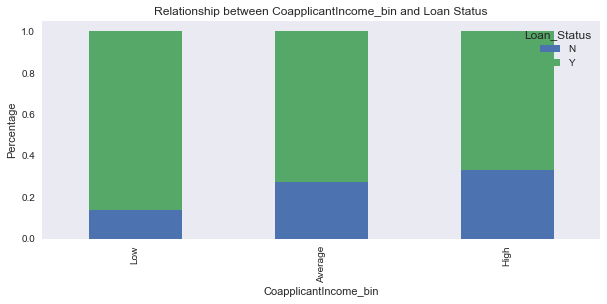

In [72]:
coapplicantIncome_bin = pd.crosstab(train.Coapplicant_Income_bin,train.Loan_Status)
print(coapplicantIncome_bin)

(coapplicantIncome_bin.divide(coapplicantIncome_bin.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(10,4)))
plt.title('Relationship between CoapplicantIncome_bin and Loan Status')
plt.xlabel('CoapplicantIncome_bin')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)

In [73]:
g, p, dof, expctd = stats.chi2_contingency(observed= coapplicantIncome_bin)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
print(expctd)
chi_squared_stat = ((((coapplicantIncome_bin-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # *
print("Critical value")
print(crit)

The chi square statistic is 3.4640082184540937
The P-value is 0.17692946843764604
The degree of freedom is 2
The expected count table 
           0           1
0   6.193548   15.806452
1  62.498534  159.501466
2  27.307918   69.692082
Critical value
5.99146454710798


`It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.`

`The expected count table show that there is significant difference in coapplicant with low and high income when compared with their observed value. This tell us that these categories seems to be associated with the loan eligibilty status.` 

`On the premise that nearly half of the loan applicant has no coapplicant and that there seems to be an association between loan status an coapplicant with low or high income.` **`Let assume to  combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.`**

In [74]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

*`Describe statistic of numerical variables after Total_Income has been computed by adding Applicant Income and Coapplicant Income`* 

In [75]:
train.describe(percentiles=[.01,.05,.1,.25,.4,.5,.75,.85,.95,.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
1%,1025.000000,0.000000,30.000000,84.00000,0.000000,2141.510000
5%,1897.550000,0.000000,56.000000,180.00000,0.000000,2800.500000
10%,2216.100000,0.000000,71.000000,294.00000,0.000000,3245.800000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
40%,3406.800000,0.000000,116.000000,360.00000,1.000000,4807.400000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000


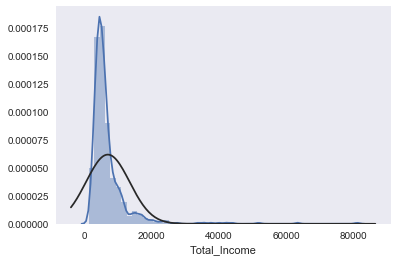

In [76]:
ax = sns.distplot(train.Total_Income, fit=norm, kde=True)

`Though The Total_Income is not normally distributed. Its value still give a reasonable evalution than that of Applicant_Income or Coapplicant_Income alone`

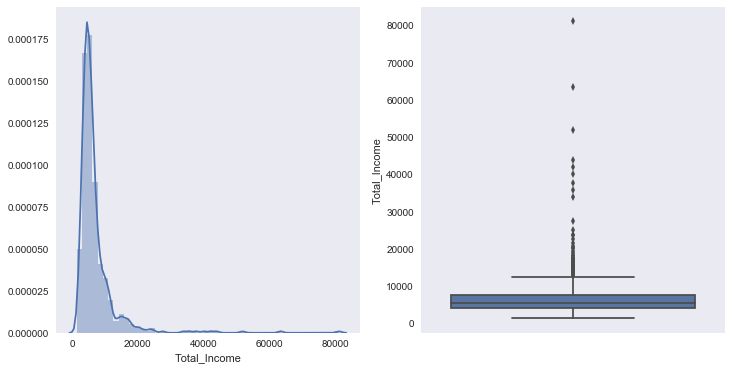

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(train['Total_Income']);

plt.subplot(122)
# train['ApplicantIncome'].plot.box(figsize=(16,5))
a=sns.boxplot(y='Total_Income',data=train,notch=False)
# a = sns.swarmplot( y='ApplicantIncome', data=train, color=".2")


`I conclude choosing the following bins:`

Category | Income range
-------- | ------------
Low | 0-2500
Average | 2500-4000
High | 4000-6000
Very High | >6000 

In [78]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Loan_Status        N    Y
Total_Income_bin         
Low               14   10
Average           32   87
High              65  159
Very high         81  166


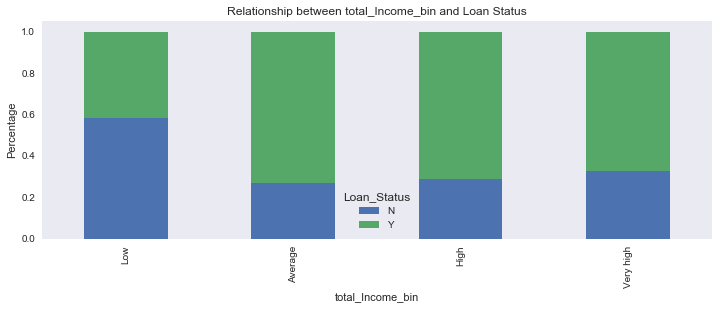

In [79]:
total_Income_bin = pd.crosstab(train.Total_Income_bin,train.Loan_Status)
print(total_Income_bin)

(total_Income_bin.divide(total_Income_bin.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(12,4)))
plt.title('Relationship between total_Income_bin and Loan Status')
plt.xlabel('total_Income_bin')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)

`We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.`

In [80]:
g, p, dof, expctd = stats.chi2_contingency(observed= total_Income_bin)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
print(expctd)
chi_squared_stat = ((((total_Income_bin-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # *
print("Critical value")
print(crit)

The chi square statistic is 10.036201335258713
The P-value is 0.018260904127128785
The degree of freedom is 3
The expected count table 
           0           1
0   7.504886   16.495114
1  37.211726   81.788274
2  70.045603  153.954397
3  77.237785  169.762215
Critical value
7.8147279032511765


***The above statistic and chart show that the Total_Income of applicant is associated with the loan eligibility status***

### Considering Loan Amount variable

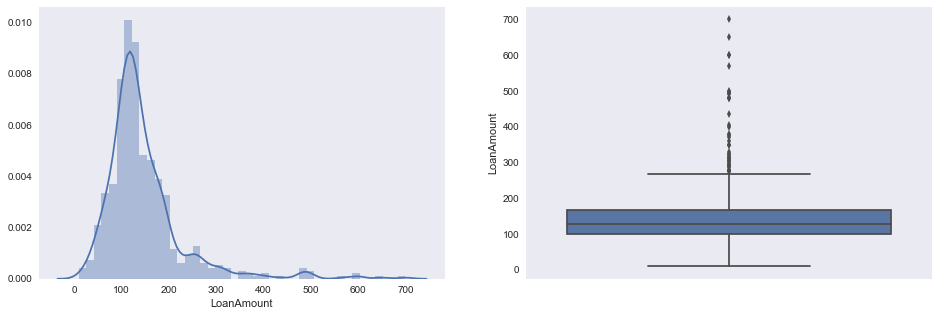

In [81]:
plt.figure(figsize=(16,5))
plt.subplot(121)
# train=train.dropna()
sns.distplot(train.LoanAmount.dropna());

plt.subplot(122)
a=sns.boxplot(y='LoanAmount',data=train,notch=False)
# train['LoanAmount'].plot.box(figsize=(16,5))

**We see a lot of outliers in this variable and the distribution is fairly normal.**

In [82]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

Loan_Status        N    Y
Total_Income_bin         
Low               14   10
Average           32   87
High              65  159
Very high         81  166


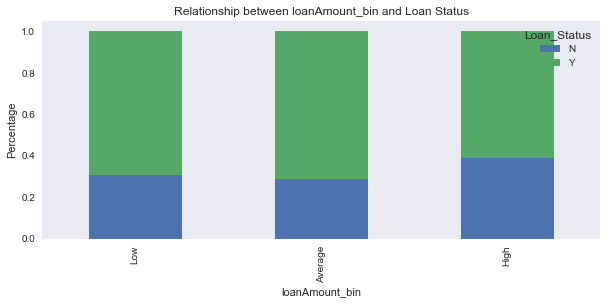

In [83]:
loanAmount_bin = pd.crosstab(train.LoanAmount_bin,train.Loan_Status)
print(total_Income_bin)

(loanAmount_bin.divide(loanAmount_bin.sum(axis=1)
               .astype(float), axis=0)
                .plot(kind="bar", stacked=True, figsize=(10,4)))
plt.title('Relationship between loanAmount_bin and Loan Status')
plt.xlabel('loanAmount_bin')
plt.ylabel('Percentage')
sns.despine(left=True,bottom=True)

`It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which I considered earlier that the chances of loan approval will be high when the loan amount is less.`

In [84]:
g, p, dof, expctd = stats.chi2_contingency(observed= loanAmount_bin)

print(f'The chi square statistic is {g}')
print(f'The P-value is {p}')
print(f'The degree of freedom is {dof}')
print(f'The expected count table ')
expctd

# calculate the chi-square-statistic
expctd = pd.DataFrame(expctd)
print(expctd)
chi_squared_stat = ((((loanAmount_bin-expctd)**2)/expctd).sum().sum())

# print(chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # *
print("Critical value")
print(crit)

The chi square statistic is 3.0679063375732625
The P-value is 0.2156813550077232
The degree of freedom is 2
The expected count table 
            0           1
0   47.084459  106.915541
1  109.456081  248.543919
2   24.459459   55.540541
Critical value
5.99146454710798


***The above statistic and chart show that the applicant Loan amount is associated with the loan eligibility status***

### Looking at the correlation between all the numerical variables.

`I will change the 3+ in dependents variable to 3 to make it a numerical variable.I will also convert the target variable’s categories into 0 and 1 i.e. map N with 0 and Y with 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input.` 

In [85]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [86]:
matrix = train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710,0.893037
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187,0.342781
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318,0.624621
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268,-0.069948
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678,-0.015109
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000,-0.031271
Total_Income,0.893037,0.342781,0.624621,-0.069948,-0.015109,-0.031271,1.000000


*Stastically absolute value of 0.25 is used as benchmark for correlation between two features*

`So get correlation between variables and set those less than 0.25 to 0`  

In [87]:
matrix_corr=train.corr().applymap(lambda x: x if abs(x)>0.25 else 0)
matrix_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
ApplicantIncome,1.000000,0.000000,0.570909,0.0,0.000000,0.000000,0.893037
CoapplicantIncome,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.342781
LoanAmount,0.570909,0.000000,1.000000,0.0,0.000000,0.000000,0.624621
Loan_Amount_Term,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
Credit_History,0.000000,0.000000,0.000000,0.0,1.000000,0.561678,0.000000
Loan_Status,0.000000,0.000000,0.000000,0.0,0.561678,1.000000,0.000000
Total_Income,0.893037,0.342781,0.624621,0.0,0.000000,0.000000,1.000000


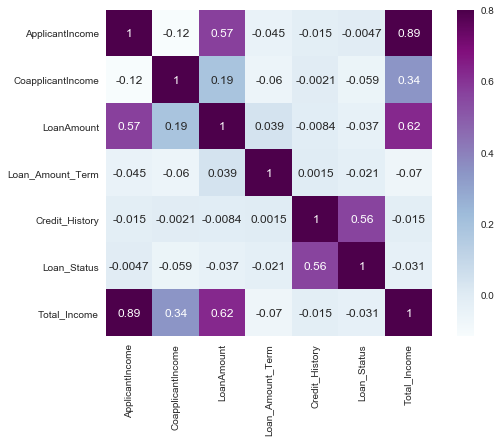

In [88]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, annot=True,cmap="BuPu");

In [89]:
matrix_corr_sorted = matrix_corr.reindex(
    columns=( list([a for a in matrix_corr.columns if a != 'Loan_Status']) +['Loan_Status'] ),
                      index=( list([a for a in matrix_corr.columns if a != 'Loan_Status']) +['Loan_Status']))

matrix_corr_sorted

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Loan_Status
ApplicantIncome,1.000000,0.000000,0.570909,0.0,0.000000,0.893037,0.000000
CoapplicantIncome,0.000000,1.000000,0.000000,0.0,0.000000,0.342781,0.000000
LoanAmount,0.570909,0.000000,1.000000,0.0,0.000000,0.624621,0.000000
Loan_Amount_Term,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
Credit_History,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.561678
Total_Income,0.893037,0.342781,0.624621,0.0,0.000000,1.000000,0.000000
Loan_Status,0.000000,0.000000,0.000000,0.0,0.561678,0.000000,1.000000


<function matplotlib.pyplot.text>

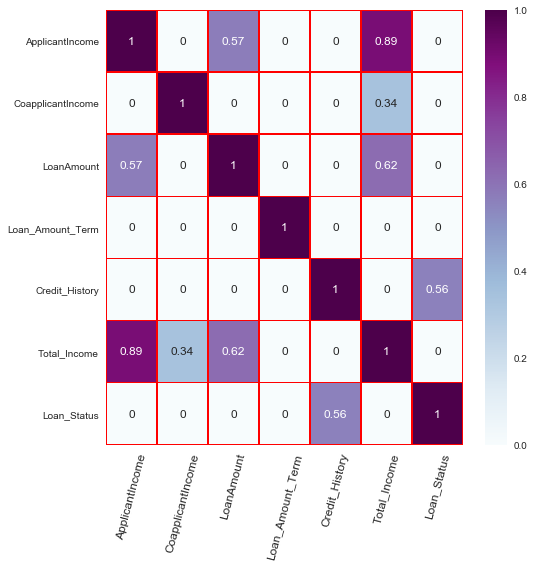

In [90]:
plt.figure(figsize=(8,8))
# plt.title('Visualization chart showing strength of correlated variables')
a=sns.heatmap(matrix_corr_sorted,cmap='BuPu',annot=True,
             linewidths=.5,linecolor='red')
plt.setp(a.get_xticklabels(), fontsize=12,rotation=75)
plt.text 

`We  use  heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.`

`We see that the most correlated variables are (ApplicantIncome - LoanAmount) ,(TotalIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.`

***We now have a better idea of what our data looks like and which variables are important to take into account when predicting loan eligibility status. We have narrowed it down to the following variables:***


* `Married Status`
* `Education`
* `Credit_History`
* `Property_Area`
* `Coapplicant_Income`
* `Total_Income`
* `Loan Amount`


`AS we now move into building machine learning models to automate our analysis, dealing with missing values, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.`


In [91]:
#  Run (once) to allow nice html output as report (optional) 

"""
Hide code cells in an IPython notebook or exported HTML using javascript. 
"""
# from nbconvert import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html(
    '<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area, .output_stderr").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

CSS = """.input_area .output_stderr {height: 2.0em; overflow: hidden}"""  # changes input_subarea width to 1 visible line
# HTML('<style>{}</style>'.format(CSS))

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version.

di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Click in rendered .html output only, toggles the code</button>''', raw=True)

Click in rendered .html output only, toggles the code

### List  of reference so far

[stat book](https://yardsale8.github.io/stat110_book/)

[DrSaed](https://www.saedsayad.com/)

[Biomarkers.ai](http://www.biomarkers.ai/)

[What is EMI](https://economictimes.indiatimes.com/definition/emi)

[Countplot with frequencies](https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies)

[Real Time Minning](https://www.researchgate.net/publication/265619432_Real_Time_Data_Mining)

[Method for association between two categorical variables](https://yardsale8.github.io/stat110_book/chp3/mosaic.html#visualizing-association-with-mosaic-plots)

[Python for data analysis index](http://hamelg.blogspot.com/2015/12/python-for-data-analysis-index.html?view=flipcard)

[The Chi square statistic](http://www.stat.wmich.edu/s216/book/node114.html)

[Hypotheses testing](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ChiSquare/BS704_HypothesisTesting-ChiSquare_print.html)

[STAT 500 chi square test of independence](https://onlinecourses.science.psu.edu/stat500/node/56/)

[28 jupyter notebook trick and tips by dataquest](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)

[Ipython-contrib-nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)

[Ipython-contrib-nbextensions-docs](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/)

[Xarang by Biomarkers data scientist](http://www.biomarkers.ai/Xarang/index.htm)

[AnalyticsVidhya training course](https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+LP101+2018_T1/course/)

[github usercontent](https://camo.githubusercontent.com/0752ef9e293123a9eb986b696030954dcf74e3ef/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f336f78485174547841615a774d4f487239752f67697068792e676966)

[create html Report from jupyter notebook](http://marpat.github.io/jupyter-notebook-html-report.html)

[RISE slideshow from jupyter notebook](https://github.com/damianavila/RISE)

[RISE mini tutorial](https://www.youtube.com/watch?v=sXyFa_r1nxA&feature=youtu.be)

[jupyter output supressed](http://marpat.github.io/tag/jupyter.html)

[jupyter extension](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)


### Missing values and outlier treatment

*After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.*

In [92]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
ApplicantIncome_bin         0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [93]:
# obtain column with missing values,their dtypes and frequency
num_of_missing_values=train.isnull().apply(lambda x:sum(x))

col_with_missing_values=num_of_missing_values.loc[num_of_missing_values>0]
print('column with missing values,their dtypes and frequency')

[f'{a} : {train[a].dtypes}: {num_of_missing_values[a]}' 
 for a in col_with_missing_values.index] 

column with missing values,their dtypes and frequency


['Gender : object: 13',
 'Married : object: 3',
 'Dependents : object: 15',
 'Self_Employed : object: 32',
 'LoanAmount : float64: 22',
 'Loan_Amount_Term : float64: 14',
 'Credit_History : float64: 50',
 'Coapplicant_Income_bin : category: 273',
 'LoanAmount_bin : category: 22']

In [94]:
# display it as a dataframe
col_with_missing_values=col_with_missing_values.to_frame(name='num_missing_val')
col_with_missing_values

,num_missing_val
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50
Coapplicant_Income_bin,273
LoanAmount_bin,22


In [95]:
# We can decide to drop the bins which we created for the exploration part with below code. 
# train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

`There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.`

***It was detected that every missing values in the data appeared as `NaN`***

I will treat the missing values in all the features one by one.

**The following  methods will be considered to fill the missing values:**

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode



**Dealing with missing values in Categorical variables**

`There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.`

In [96]:
# check for missing values in categorical variables
train.select_dtypes(exclude=np.number).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Loan_ID                   614 non-null object
Gender                    601 non-null object
Married                   611 non-null object
Dependents                599 non-null object
Education                 614 non-null object
Self_Employed             582 non-null object
Property_Area             614 non-null object
ApplicantIncome_bin       614 non-null category
Coapplicant_Income_bin    341 non-null category
Total_Income_bin          614 non-null category
LoanAmount_bin            592 non-null category
dtypes: category(4), object(7)
memory usage: 297.8 KB


In [97]:
# fill all missing values in categorical variable with their mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

**Dealing with missing values in Categorical variables**



In [98]:
# check for missing values in numerical variables
train.select_dtypes(include=np.number).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
Total_Income         614 non-null float64
dtypes: float64(5), int64(2)
memory usage: 33.7 KB


***Only `LoanAmount` and `LoanAmountTerm`  have missing values***

In [99]:
# Now let’s try to find a way to fill the missing values in Loan_Amount_Term. 
# We will look at the value count of the Loan amount term variable.
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

**It can be seen that in `loan amount term `variable, the value of 360 is repeating the most and it has only 14 missing values. So we will replace the missing values in this variable using the mode (not the mean) of this variable.**

In [100]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

`Now we have left the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.` 

**I will use median to fill the null values as earlier noticed that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.**

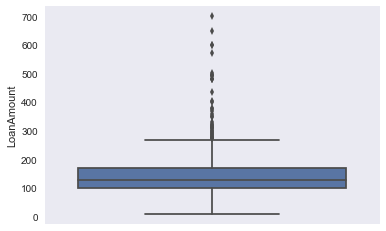

In [101]:
a=sns.boxplot(y='LoanAmount',data=train,notch=False)
# a=sns.swarmplot(y='ApplicantIncome',data=train,notch=False)

In [102]:
# fill every missing values in the LoanAmount variable with the median value
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [103]:
# check if all missing values have been treated
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
ApplicantIncome_bin         0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [104]:
#  fill all the missing values in the test dataset too with the same approach.
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

**Outlier treatment**

*`Having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.`*



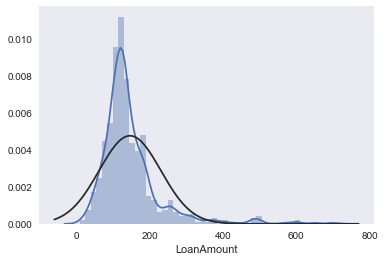

In [105]:
sns.distplot(train.LoanAmount, fit=norm, kde=True,hist=True)

In [106]:
train.LoanAmount.describe(percentiles=[.001,.01,.05,.1,.25,.4,.5,.75,.85,.95,.96,.97,.98,.99])

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
0.1%      13.904000
1%        30.650000
5%        57.300000
10%       72.300000
25%      100.250000
40%      119.200000
50%      128.000000
75%      164.750000
85%      188.100000
95%      293.400000
96%      313.440000
97%      356.100000
98%      427.940000
99%      495.870000
max      700.000000
Name: LoanAmount, dtype: float64

**The outlier is about 5% of the distribution at upper right side of the data**

*Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called `right skewness.`*

One way to remove the skewness is by doing the `log transformation.` As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. `So, we get a distribution similar to normal distribution.`

**Create a dataframe comparing the real values of LoanAmount to its log transformed values**

In [107]:
# examine the effect of the log transformation
realLog_LoanVal=pd.DataFrame(data={'real_value': train.LoanAmount,
                     'log_transformed_value':np.log(train.LoanAmount)})

realLog_LoanVal.sample(frac=0.05)


,log_transformed_value,real_value
263,4.787492,120.0
418,4.718499,112.0
442,4.997212,148.0
5,5.587249,267.0
512,4.997212,148.0
139,4.859812,129.0
160,4.584967,98.0
149,4.828314,125.0
37,4.969813,144.0
224,4.852030,128.0


In [108]:
# filter the outlier
realLog_LoanVal.loc[realLog_LoanVal.real_value>293,:]

,log_transformed_value,real_value
9,5.855072,349.0
21,5.752573,315.0
34,5.768321,320.0
67,5.743003,312.0
126,5.913503,370.0
130,6.476972,650.0
155,6.396930,600.0
171,6.551080,700.0
177,6.204558,495.0
258,5.717028,304.0


Text(0.5,1,'Normal Distribution  of Loan Amount after log transform')

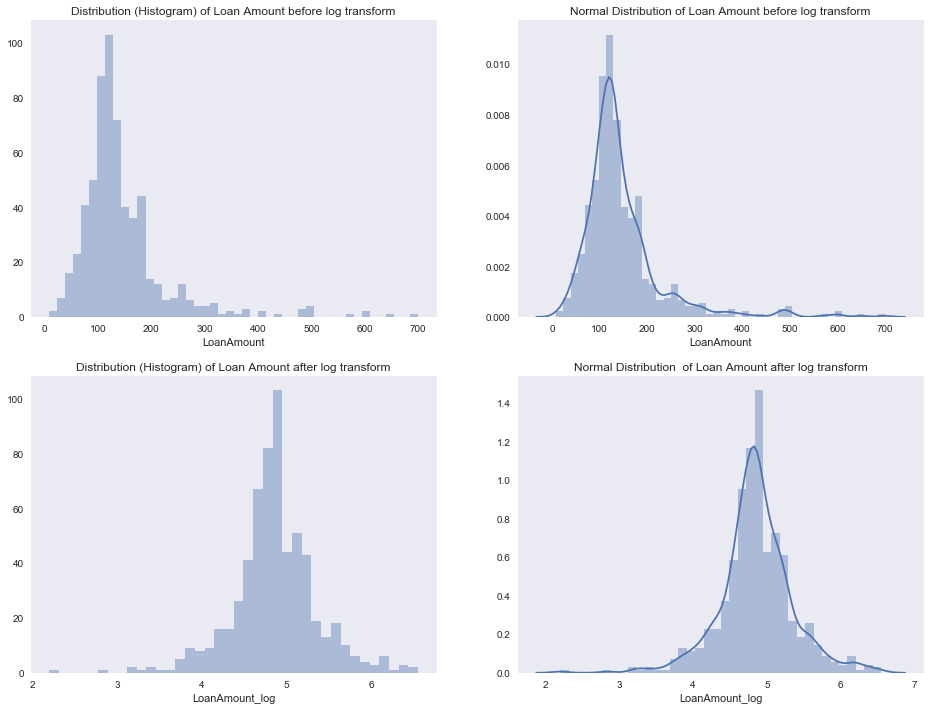

In [109]:
# autheticate the log transform in the datasets
train['LoanAmount_log'] = np.log(train['LoanAmount'])

test['LoanAmount_log'] = np.log(test['LoanAmount'])

plt.figure(figsize=(16,12))
plt.subplot(221)
ax=sns.distplot(train.LoanAmount, kde=False)
ax.set_title('Distribution (Histogram) of Loan Amount before log transform')
# train['LoanAmount'].hist(bins=20)


plt.subplot(222)
ax=sns.distplot(train.LoanAmount);
ax.set_title('Normal Distribution of Loan Amount before log transform')

plt.subplot(223)
ax=sns.distplot(train.LoanAmount_log, kde=False)
ax.set_title('Distribution (Histogram) of Loan Amount after log transform')
# train['LoanAmount_log'].hist(bins=20)


plt.subplot(224)
ax=sns.distplot(train.LoanAmount_log);
ax.set_title('Normal Distribution  of Loan Amount after log transform')

 *`Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.`*

### Evaluating Metrics for Classification Problem Explained

The process of `model building` is not complete without `evaluation of model’s performance`. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. 

*Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:*

![metrics_accuracy](image/metrics_accuracy.PNG)

* True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
* True Negative - Targets which are actually false(N) and we have predicted them false(N)
* False Positive - Targets which are actually false(N) but we have predicted them true(T)
* False Negative - Targets which are actually true(T) but we have predicted them false(N)

![accuracy_formula](image/accuracy_formual.png)

**Precision**: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.

$$Precision = \frac{TP}{TP + FP}$$

**Recall(Sensitivity)** - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’.
$$Recall/SEnsitivity = \frac{TP}{TP + FN}$$

Specificity - It is a measure of how many observations of false class are labeled correctly.
 $$Specificity = \frac{TN}{TN + FP}$$

**We can rephrase the evaluation metrics as follows:**
* *Precision : how many true observation are labelled true*
* *Sensitivity : how correctly did we label true class*
* *Specificity : how many false observation are labelled false*

**ROC curve**
 
`Receiver Operating Characteristic(ROC)` summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).

`The area under curve (AUC)`, referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

`Specificity and Sensitivity plays a crucial role in deriving ROC curve.`

**This how roc curve look likes**
![roc_curve](image/roc_curve.png)

The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.

So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.

We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.
For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. 

But for class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the  model for class 2 will be better.

The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1 model as the AUC is more for those classes.

### Model Development

* **1. Logistic Regression**

[`Logistic Regression`](https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/) is a classification algorithm. 

It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

Logistic regression is an estimation of Logit function. 

Logit function is simply a log of odds in favor of the event.

This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

In [110]:
# Loan_Status have no effect on our model, so we need to drop it
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

# drop all newly created binned variables
train.drop(columns=['ApplicantIncome_bin',
                    'Coapplicant_Income_bin','Total_Income_bin','LoanAmount_bin'],inplace=True)

# other features except Loan Status becomes our predictor matrix
X = train.drop('Loan_Status', axis=1) 

# the response vector
y = train.Loan_Status

In [111]:
# make dummy variables for the categorical variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

***`Validation of trained Model`***

*Can we validate our predictions?*

One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [112]:
# split train dataset into train and validation
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. 

Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. To learn about other parameters, refer [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [114]:
# Let’s predict the Loan_Status for validation set and calculate its accuracy.

pred_cv = model.predict(x_cv)

# Let us calculate how accurate our predictions are by calculating the accuracy.

In [115]:
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [116]:
test['Total_Income'] = train.Total_Income

In [117]:
pred_test = model.predict(test)

In [118]:
submission=pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [119]:
submission

,Loan_ID,Loan_Status


In [120]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [121]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,N
8,LP001059,N
9,LP001067,N
